# **1.Data Scrapping using Requests**

1.1 Initial Information Extraction

In [37]:
# using Requests to get HTML
import requests
import pandas as pd

In [70]:
# get the TRUSTPILOT urls for Mcdonalds reviews
urls = [
    "https://www.trustpilot.com/review/www.mcdonalds.co.uk",
    "https://www.trustpilot.com/review/www.mcdonalds.com",
    "https://www.trustpilot.com/review/people.mcdonalds.co.uk"]

In [71]:
# get html status and source codes
for url in urls:
    html = requests.get(url)
    print(f"Fetched {url}: {html.status_code}")
    #print(f"HTML text:{html.text}")

Fetched https://www.trustpilot.com/review/www.mcdonalds.co.uk: 403
Fetched https://www.trustpilot.com/review/www.mcdonalds.com: 403
Fetched https://www.trustpilot.com/review/people.mcdonalds.co.uk: 403


In [40]:
# Prase the html_1 file for extracting information using BeatifulSoup
from bs4 import BeautifulSoup
url_1 = "https://www.trustpilot.com/review/www.mcdonalds.co.uk"
html_1 = requests.get(url_1)
soup = BeautifulSoup(html_1.text)

In [41]:
# Extract the right information from html with CSS selector
name_path = "#__next > div > div > div > main > div > div > div > div > div > div > div > section > div > div > article > div > div > aside > div > a > span"
regions_path = "#__next > div > div > div > main > div > div > div > div > div > div > div > section > div > div > article > div > div > aside > div > a > div > span:nth-child(1)"
rating_elements = soup.select('div[data-service-review-rating]')
dates_path = "#__next > div > div > div > main > div > div > div > div > div > div > div > section > div > div > article > div > section > div > p > span"
title_path = "#__next > div > div > div > main > div > div > div > div > div > div > div > section > div > div > article > div > section > div > a"
content_path = "#__next > div > div > div > main > div > div > div > div > div > div > div > section > div > div > article > div > section > div > p.typography_body-l__v5JLj.typography_appearance-default__t8iAq"
css_path = "#__next > div > div > div > main > div > div > div > div > div > div > div > section > div > div > article > div > section > div > a"

In [42]:
# find all information
names = [x.text for x in soup.select(name_path)]
regions = [x.text for x in soup.select(regions_path)]
ratings = [el["data-service-review-rating"] for el in rating_elements]
dates = [x.text for x in soup.select(dates_path)]
titles = [x.text for x in soup.select(title_path)]
contents = [x.text for x in soup.select(content_path)]
## Comnplete the url
#pre_url = "https://www.trustpilot.com"
#href = [pre_url+x['href'] for x in soup.select(css_path)]

In [43]:
# check columns lenths
print("names:", len(names))
print("regions:", len(regions))
print("ratings:", len(ratings))
print("dates:", len(dates))
print("titles:", len(titles))
print("contents:", len(contents))

names: 20
regions: 20
ratings: 20
dates: 20
titles: 20
contents: 18


In [44]:
# fill the length gap
contents += ["NA"] * (len(titles) - len(contents))

In [45]:
comments_df = pd.DataFrame({
    'name':names,
    'region':regions,
    'rating':ratings,
    'date':dates,
    'title':titles,
    'content':contents,
    #'href':href
})
comments_df

name region rating               date  \
0            TracyB     GB      1     March 31, 2025   
1             Carla     GB      1     March 31, 2025   
2          Customer     GB      1     March 31, 2025   
3       clare quinn     IE      1     March 31, 2025   
4              Luke     GB      1     March 31, 2025   
5        Glen Haigh     GB      1     March 31, 2025   
6   Harriet Bristow     GB      1     March 31, 2025   
7              Nick     GB      1     March 30, 2025   
8      Mark Summers     GB      1     March 30, 2025   
9               Eko     GB      3     March 22, 2025   
10         Abin k.s     IN      5     March 29, 2025   
11  Mohammed Javeed     IN      5     March 27, 2025   
12     Faizal Shaik     IN      5  November 12, 2024   
13       Luke Ryder     GB      1     March 30, 2025   
14           Simon      GB      1     March 29, 2025   
15     Mo Mehmetali     GB      1     March 29, 2025   
16              Lee     GB      1     March 29, 2025   
17     Marek Markus     GB      1     March 27, 2025   
18            jon c     GB      1     March 29, 2025   
19     Nicola Firth     GB      1     March 28, 2025   

                                                title  \
0                              Robbed by McDonald's.    
1              We ordered our food and it's taken 30…   
2                             Missing item from order   
3                                   Cold yet again!!!   
4                             Stop going to Mcdonalds   
5                                         Never Again   
6                                            Thief’s    
7                        Bunch of clowns and thieves    
8                                  Appalling company    
9    Go here if you want to have a once a month meal.   
10                   It was good.enjoyed it very well   
11                                       Good service   
12                                    Good experience   
13                              Mcdonals Vile Burgurs   
14               There so bad here they use Uber and…   
15  Just ordered from the app worst thing I’ve eve...   
16                               Ordered for delivery   
17              Worst customer service in the UK !!!!   
18                Our local McDonalds at Wessex gate…   
19                                       Never again    

                                              content  
0   I feel robbed and I'd have given zero stars fo...  
1   We ordered our food and it's taken 30 mins for...  
2   When your order is missing an item there is no...  
3   McDonald's Review - Rawcliffe Road, Airmyn, Go...  
4   How are you justifying these prices?The minecr...  
5   Visited Stairfoot branch this time, only given...  
6   Ordered through the McDonalds app to be delive...  
7   It’s funny they have Ronald McDonald and the h...  
8   Appalling company Do not order from here with ...  
9                 Tasty food although very unhealthy   
10                                      Good service   
11  While MaDonalds food standards have been in de...  
12  There so bad here they use Uber and always the...  
13  Just ordered from the app, time changed twice ...  
14  Ordered for delivery, completely the wrong ord...  
15  Problem reference number: 4960727McDonalds cus...  
16  Our local McDonalds at Wessex gate retail are ...  
17  Went to Darlington McDonald's yesterday ordere...  
18                                                 NA  
19                                                 NA

1.2 DataFrame Defining & Further Information

using only https://www.trustpilot.com/review/www.mcdonalds.co.uk

In [67]:
# define df for further scraping, remember to check the match url
def fetch_comments(url, star):
  html = requests.get(url)
  soup = BeautifulSoup(html.text)

  names = [x.text for x in soup.select(name_path)]
  regions = [x.text for x in soup.select(regions_path)]
  dates = [x.text for x in soup.select(dates_path)]
  titles = [x.text for x in soup.select(title_path)]
  contents = [x.text for x in soup.select(content_path)]
  star_group = [int(star)] * len(names)

  # length alignment
  min_len = min(len(names), len(regions), len(dates), len(titles), len(contents))

  names = names[:min_len]
  regions = regions[:min_len]
  dates = dates[:min_len]
  titles = titles[:min_len]
  contents = contents[:min_len]
  star_group = [int(star)] * min_len

  comments_df = pd.DataFrame({
    'name': names,
    'region': regions,
    'date': dates,
    'title': titles,
    'content': contents,
    'star_group': star_group
  })

  return comments_df

In [68]:
star_1_urls = ["https://www.trustpilot.com/review/www.mcdonalds.co.uk?date=last12months&page=%s&stars=1"%x for x in range(1, 78)]
star_2_urls = ["https://www.trustpilot.com/review/www.mcdonalds.co.uk?date=last12months&page=%s&stars=2"%x for x in range(1, 7)]
star_3_urls = ["https://www.trustpilot.com/review/www.mcdonalds.co.uk?date=last12months&page=%s&stars=3"%x for x in range(1, 4)]
star_4_urls = ["https://www.trustpilot.com/review/www.mcdonalds.co.uk?date=last12months&page=%s&stars=4"%x for x in range(1, 2)]
star_5_urls = ["https://www.trustpilot.com/review/www.mcdonalds.co.uk?date=last12months&page=%s&stars=5"%x for x in range(1, 10)]

In [69]:
comments_all = pd.concat(
    [fetch_comments(url, '1') for url in star_1_urls] +
    [fetch_comments(url, '2') for url in star_2_urls] +
    [fetch_comments(url, '3') for url in star_3_urls] +
    [fetch_comments(url, '4') for url in star_4_urls] +
    [fetch_comments(url, '5') for url in star_5_urls]
)
comments_all['star_group'].value_counts()

Series([], Name: count, dtype: int64)

In [53]:
df_UK = comments_all[comments_all['region'].isin(['GB'])]
print(df_UK[df_UK['region'] == 'GB'].count())
df_UK.to_csv("mcdonalds_pages_uk.csv")

name          1378
region        1378
date          1378
title         1378
content       1378
star_group    1378
dtype: int64


In [54]:
df_UK

name region            date  \
0              TracyB     GB  March 31, 2025   
1               Carla     GB  March 31, 2025   
2            Customer     GB  March 31, 2025   
4                Luke     GB  March 31, 2025   
5          Glen Haigh     GB  March 31, 2025   
..                ...    ...             ...   
15             Joanne     GB  April 21, 2024   
16                Jay     GB  April 17, 2024   
17  Cristina Davidson     GB  April 21, 2024   
18        Danny Mahon     GB  April 21, 2024   
19           Consumer     GB  April 21, 2024   

                                     title  \
0                   Robbed by McDonald's.    
1   We ordered our food and it's taken 30…   
2                  Missing item from order   
4                  Stop going to Mcdonalds   
5                              Never Again   
..                                     ...   
15  McDonald's snowhill Wakefield are the…   
16          Absolute disgusting from both…   
17      I usually never write reviews and…   
18                                    Crap   
19                      A waste of my time   

                                              content  star_group  
0   I feel robbed and I'd have given zero stars fo...         1.0  
1   We ordered our food and it's taken 30 mins for...         1.0  
2   When your order is missing an item there is no...         1.0  
4   How are you justifying these prices?The minecr...         1.0  
5   Visited Stairfoot branch this time, only given...         1.0  
..                                                ...         ...  
15  McDonald's snowhill Wakefield are the most inc...         1.0  
16  Absolute disgusting from both McDonalds, Lomba...         1.0  
17  I usually never write reviews and McDonald’s j...         1.0  
18  If you're into eating a stone cold breakfast, ...         1.0  
19  I waited in line at the drive through for 45 m...         1.0  

[1378 rows x 6 columns]

# **2. Data Preprocessing**

In [4]:
import pandas as pd
import numpy as np

import re
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Get the dataframe
DATASET_COLUMNS = ['id', 'name', 'region', 'date', 'title', 'content', 'star_group']
df_UK = pd.read_csv("mcdonalds_pages_uk.csv", encoding="ISO-8859-1",names=DATASET_COLUMNS)
df_UK.head(20)

# Drop the original titles
df_UK = df_UK.drop(df_UK.index[0]).drop(columns=['id', 'name', 'region'], axis=1)
df_UK.head()

# text = title + content
df_UK['text'] = df_UK['title'].fillna('') + " " + df_UK['content'].fillna('')
df_UK.drop(columns=['title', 'content'], inplace=True)
df_UK.head()

date star_group  \
1  March 31, 2025          1   
2  March 31, 2025          1   
3  March 31, 2025          1   
4  March 30, 2025          1   
5  March 30, 2025          1   

                                                text  
1  Stop going to Mcdonalds How are you justifying...  
2  Never Again Visited Stairfoot branch this time...  
3  Thiefâs  Ordered through the McDonalds app t...  
4  Bunch of clowns and thieves  Itâs funny they...  
5  Appalling company  Appalling company Do not or...

In [6]:
df_UK['star_group'].value_counts()

star_group
1    1458
5     146
2     112
3      46
4      15
Name: count, dtype: int64

In [7]:
# check the time period
df_UK['date'] = pd.to_datetime(df_UK['date'])
print(f"time period: {df_UK['date'].min().date()} to {df_UK['date'].max().date()}")
# fix the time
df_UK = df_UK[(df_UK['date'] >= '2024-03-01')&(df_UK['date'] <= '2025-03-30')]
#df_UK = df_UK[(df_UK['date'] >= '2024-03-01')]
print(f"Last 12 months time period: {df_UK['date'].min().date()} to {df_UK['date'].max().date()}")
df_UK.count()

time period: 2023-05-11 to 2025-03-31
Last 12 months time period: 2024-03-06 to 2025-03-30


date          1751
star_group    1751
text          1751
dtype: int64

For sentiment analysis


In [8]:
# define sentiment dictionary
sentiment_dict = {
    1: "Negative",
    2: "Neutral-Negative",
    3: "Neutral-Negative",
    4: "Positive",
    5: "Positive"
}

# define sentiment mapping
def star_to_sentiment(star):
  return sentiment_dict.get(int(float(star)))

# Apply the star to sentiment
df_UK["sentiment"] = df_UK['star_group'].apply(star_to_sentiment)
df_UK.head()

date star_group                                               text  \
4 2025-03-30          1  Bunch of clowns and thieves  Itâs funny they...   
5 2025-03-30          1  Appalling company  Appalling company Do not or...   
6 2025-03-22          1  Go here if you want to have a once a month mea...   
7 2025-03-30          1  Mcdonals Vile Burgurs Just ordered from the ap...   
8 2025-03-29          1  There so bad here they use Uber andâ¦ Ordered...   

  sentiment  
4  Negative  
5  Negative  
6  Negative  
7  Negative  
8  Negative

Cleaning

In [77]:
!pip install unidecode

In [28]:
# Remove diacritics words
from unidecode import unidecode
df_UK['text'] = df_UK['text'].apply(lambda x: unidecode(str(x)))

# Remove URLs
def remove_URLs(data):
    return re.sub(r'((http://)[^\s]*|(https://)[^\s]*|(www\.)[^\s]*)', ' ', data)
df_UK['text'] = df_UK['text'].apply(lambda x: remove_URLs(x))

# Remove punctuations
def remove_punctuations(data):
    return re.sub(r"[^\w\s]", " ", data)

df_UK['text']= df_UK['text'].apply(lambda x: remove_punctuations(x))

# Remove numbers
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)
df_UK['text'] = df_UK['text'].apply(lambda x: remove_numbers(x))

# lowcase
df_UK['text'] = df_UK['text'].str.lower()
df_UK.head(30)

date star_group                                               text  \
4  2025-03-30          1  bunch clown thief itas funny ronald hamburglar...   
5  2025-03-30          1  appalling company appalling company order deli...   
6  2025-03-22          1   go want month meal tasty food although unhealthy   
7  2025-03-30          1  mcdonals vile burgurs ordered app time changed...   
8  2025-03-29          1  bad use uber anda  ordered delivery completely...   
9  2025-03-29          1  ordered app worst thing iave ever done problem...   
10 2025-03-29          1  ordered delivery local wessex gate retail terr...   
11 2025-03-27          1  worst customer service uk went darlington yest...   
12 2025-03-29          1  local wessex gatea  ordered food byker dk bran...   
13 2025-03-28          1  never staff slow food warm look looked busy wa...   
14 2025-03-29          1  ordered food byker dka  spend almost aps food ...   
15 2025-03-23          1  newportt jane erith served excellent customer ...   
16 2025-03-19          1  really ca n t believe people sita  really ca n...   
17 2025-03-26          1  leatherhead awful leatherhead shocking shortag...   
18 2025-03-26          1  hot drink served lukewarm appears stanier reta...   
19 2025-03-25          1  ordered muffin cheese egg got a  ordered muffi...   
20 2025-03-23          1  terrible bradley stokea  new advert state burg...   
21 2025-01-18          1  butt ln butt ln farnley leeds l je poor custom...   
22 2025-03-23          1  charge extra without consumersa  charge extra ...   
23 2025-03-24          1  uk menu booooooooooooooooooring uk menu booooo...   
24 2025-02-26          1  delivery bad pad food rotten posonus bad kill ...   
25 2025-03-23          1  place line order incorrect line order double q...   
26 2025-03-23          1  called avoidutside thea  called outside south ...   
27 2025-03-23          1  put business people put business people aps ea...   
28 2025-03-22          1  poor poor poor poor poor poor ordered food say...   
29 2025-03-21          1  food like rubber disappointed drive friern bar...   
30 2025-03-22          1  disappointed drive througha  could leave star ...   
31 2025-03-21          1  shocking service waiting long meal bad wait me...   
32 2025-03-21          1  waiting long meal experience mcdelivery appa  ...   
33 2025-03-20          1  experience theira  extremely disappointed serv...   

   sentiment                                             tokens  
4   Negative  [bunch, clown, thief, itas, funny, ronald, ham...  
5   Negative  [appalling, company, appalling, company, order...  
6   Negative  [go, want, month, meal, tasty, food, although,...  
7   Negative  [mcdonals, vile, burgurs, ordered, app, time, ...  
8   Negative  [bad, use, uber, anda|, ordered, delivery, com...  
9   Negative  [ordered, app, worst, thing, iave, ever, done,...  
10  Negative  [ordered, delivery, local, wessex, gate, retai...  
11  Negative  [worst, customer, service, uk, went, darlingto...  
12  Negative  [local, wessex, gatea|, ordered, food, byker, ...  
13  Negative  [never, staff, slow, food, warm, look, looked,...  
14  Negative  [ordered, food, byker, dka|, spend, almost, ap...  
15  Negative  [newportt, jane, erith, served, excellent, cus...  
16  Negative  [really, ca, n't, believe, people, sita|, real...  
17  Negative  [leatherhead, awful, leatherhead, shocking, sh...  
18  Negative  [hot, drink, served, lukewarm, appears, stanie...  
19  Negative  [ordered, muffin, cheese, egg, got, a|, ordere...  
20  Negative  [terrible, bradley, stokea|, new, advert, stat...  
21  Negative  [butt, ln, butt, ln, farnley, leeds, l, je, po...  
22  Negative  [charge, extra, without, consumersa|, charge, ...  
23  Negative  [uk, menu, booooooooooooooooooring, uk, menu, ...  
24  Negative  [delivery, bad, pad, food, rotten, posonus, ba...  
25  Negative  [place, line, order, incorrect, line, order, d...  
26  Negative  [called, avoidutside, thea|

In [29]:
# Removing the stop words list from text
stop_words = stopwords.words('english')
new_stopwords = ["mcdonald's","mcdonald","mcdonalda","mcdonaldas","mcdonalds"]
stop_words.extend(new_stopwords)

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df_UK['text'] = df_UK['text'].apply(lambda text: cleaning_stopwords(text))
df_UK.head(30)

date star_group                                               text  \
4  2025-03-30          1  bunch clown thief itas funny ronald hamburglar...   
5  2025-03-30          1  appalling company appalling company order deli...   
6  2025-03-22          1   go want month meal tasty food although unhealthy   
7  2025-03-30          1  mcdonals vile burgurs ordered app time changed...   
8  2025-03-29          1  bad use uber anda ordered delivery completely ...   
9  2025-03-29          1  ordered app worst thing iave ever done problem...   
10 2025-03-29          1  ordered delivery local wessex gate retail terr...   
11 2025-03-27          1  worst customer service uk went darlington yest...   
12 2025-03-29          1  local wessex gatea ordered food byker dk branc...   
13 2025-03-28          1  never staff slow food warm look looked busy wa...   
14 2025-03-29          1  ordered food byker dka spend almost aps food w...   
15 2025-03-23          1  newportt jane erith served excellent customer ...   
16 2025-03-19          1  really ca n believe people sita really ca n be...   
17 2025-03-26          1  leatherhead awful leatherhead shocking shortag...   
18 2025-03-26          1  hot drink served lukewarm appears stanier reta...   
19 2025-03-25          1  ordered muffin cheese egg got ordered muffin c...   
20 2025-03-23          1  terrible bradley stokea new advert state burge...   
21 2025-01-18          1  butt ln butt ln farnley leeds l je poor custom...   
22 2025-03-23          1  charge extra without consumersa charge extra w...   
23 2025-03-24          1  uk menu booooooooooooooooooring uk menu booooo...   
24 2025-02-26          1  delivery bad pad food rotten posonus bad kill ...   
25 2025-03-23          1  place line order incorrect line order double q...   
26 2025-03-23          1  called avoidutside thea called outside south t...   
27 2025-03-23          1  put business people put business people aps ea...   
28 2025-03-22          1  poor poor poor poor poor poor ordered food say...   
29 2025-03-21          1  food like rubber disappointed drive friern bar...   
30 2025-03-22          1  disappointed drive througha could leave star w...   
31 2025-03-21          1  shocking service waiting long meal bad wait me...   
32 2025-03-21          1  waiting long meal experience mcdelivery appa a...   
33 2025-03-20          1  experience theira extremely disappointed servi...   

   sentiment                                             tokens  
4   Negative  [bunch, clown, thief, itas, funny, ronald, ham...  
5   Negative  [appalling, company, appalling, company, order...  
6   Negative  [go, want, month, meal, tasty, food, although,...  
7   Negative  [mcdonals, vile, burgurs, ordered, app, time, ...  
8   Negative  [bad, use, uber, anda|, ordered, delivery, com...  
9   Negative  [ordered, app, worst, thing, iave, ever, done,...  
10  Negative  [ordered, delivery, local, wessex, gate, retai...  
11  Negative  [worst, customer, service, uk, went, darlingto...  
12  Negative  [local, wessex, gatea|, ordered, food, byker, ...  
13  Negative  [never, staff, slow, food, warm, look, looked,...  
14  Negative  [ordered, food, byker, dka|, spend, almost, ap...  
15  Negative  [newportt, jane, erith, served, excellent, cus...  
16  Negative  [really, ca, n't, believe, people, sita|, real...  
17  Negative  [leatherhead, awful, leatherhead, shocking, sh...  
18  Negative  [hot, drink, served, lukewarm, appears, stanie...  
19  Negative  [ordered, muffin, cheese, egg, got, a|, ordere...  
20  Negative  [terrible, bradley, stokea|, new, advert, stat...  
21  Negative  [butt, ln, butt, ln, farnley, leeds, l, je, po...  
22  Negative  [charge, extra, without, consumersa|, charge, ...  
23  Negative  [uk, menu, booooooooooooooooooring, uk, menu, ...  
24  Negative  [delivery, bad, pad, food, rotten, posonus, ba...  
25  Negative  [place, line, order, incorrect, line, order, d...  
26  Negative  [called, avoidutside, thea|

In [30]:
# import and download the resource lemmatize needs
import nltk
nltk.download('wordnet')

# lemmatize
lm = WordNetLemmatizer()

def lemmatizer_on_text(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lm.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df_UK['text'] = df_UK['text'].apply(lemmatizer_on_text)
df_UK.head(30)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


date star_group                                               text  \
4  2025-03-30          1  bunch clown thief itas funny ronald hamburglar...   
5  2025-03-30          1  appalling company appalling company order deli...   
6  2025-03-22          1   go want month meal tasty food although unhealthy   
7  2025-03-30          1  mcdonals vile burgurs ordered app time changed...   
8  2025-03-29          1  bad use uber anda ordered delivery completely ...   
9  2025-03-29          1  ordered app worst thing iave ever done problem...   
10 2025-03-29          1  ordered delivery local wessex gate retail terr...   
11 2025-03-27          1  worst customer service uk went darlington yest...   
12 2025-03-29          1  local wessex gatea ordered food byker dk branc...   
13 2025-03-28          1  never staff slow food warm look looked busy wa...   
14 2025-03-29          1  ordered food byker dka spend almost aps food w...   
15 2025-03-23          1  newportt jane erith served excellent customer ...   
16 2025-03-19          1  really ca n believe people sita really ca n be...   
17 2025-03-26          1  leatherhead awful leatherhead shocking shortag...   
18 2025-03-26          1  hot drink served lukewarm appears stanier reta...   
19 2025-03-25          1  ordered muffin cheese egg got ordered muffin c...   
20 2025-03-23          1  terrible bradley stokea new advert state burge...   
21 2025-01-18          1  butt ln butt ln farnley leeds l je poor custom...   
22 2025-03-23          1  charge extra without consumersa charge extra w...   
23 2025-03-24          1  uk menu booooooooooooooooooring uk menu booooo...   
24 2025-02-26          1  delivery bad pad food rotten posonus bad kill ...   
25 2025-03-23          1  place line order incorrect line order double q...   
26 2025-03-23          1  called avoidutside thea called outside south t...   
27 2025-03-23          1  put business people put business people aps ea...   
28 2025-03-22          1  poor poor poor poor poor poor ordered food say...   
29 2025-03-21          1  food like rubber disappointed drive friern bar...   
30 2025-03-22          1  disappointed drive througha could leave star w...   
31 2025-03-21          1  shocking service waiting long meal bad wait me...   
32 2025-03-21          1  waiting long meal experience mcdelivery appa a...   
33 2025-03-20          1  experience theira extremely disappointed servi...   

   sentiment                                             tokens  
4   Negative  [bunch, clown, thief, itas, funny, ronald, ham...  
5   Negative  [appalling, company, appalling, company, order...  
6   Negative  [go, want, month, meal, tasty, food, although,...  
7   Negative  [mcdonals, vile, burgurs, ordered, app, time, ...  
8   Negative  [bad, use, uber, anda|, ordered, delivery, com...  
9   Negative  [ordered, app, worst, thing, iave, ever, done,...  
10  Negative  [ordered, delivery, local, wessex, gate, retai...  
11  Negative  [worst, customer, service, uk, went, darlingto...  
12  Negative  [local, wessex, gatea|, ordered, food, byker, ...  
13  Negative  [never, staff, slow, food, warm, look, looked,...  
14  Negative  [ordered, food, byker, dka|, spend, almost, ap...  
15  Negative  [newportt, jane, erith, served, excellent, cus...  
16  Negative  [really, ca, n't, believe, people, sita|, real...  
17  Negative  [leatherhead, awful, leatherhead, shocking, sh...  
18  Negative  [hot, drink, served, lukewarm, appears, stanie...  
19  Negative  [ordered, muffin, cheese, egg, got, a|, ordere...  
20  Negative  [terrible, bradley, stokea|, new, advert, stat...  
21  Negative  [butt, ln, butt, ln, farnley, leeds, l, je, po...  
22  Negative  [charge, extra, without, consumersa|, charge, ...  
23  Negative  [uk, menu, booooooooooooooooooring, uk, menu, ...  
24  Negative  [delivery, bad, pad, food, rotten, posonus, ba...  
25  Negative  [place, line, order, incorrect, line, order, d...  
26  Negative  [called, avoidutside, thea|

In [31]:
df_cleaned = df_UK.copy()
df_cleaned.to_csv("mcdonalds_uk_cleaned.csv")

Descriptive Analysis

# **3. Sentiment Analysis**

sentiment
Negative            1446
Positive             153
Neutral-Negative     152
Name: count, dtype: int64


Text(0.5, 1.0, 'Sentiment Data Distribution')

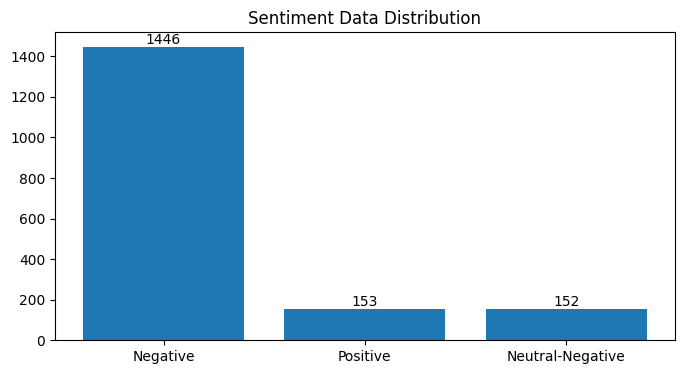

In [17]:
val_count = df_cleaned.sentiment.value_counts()

print(val_count)
plt.figure(figsize=(8,4))
bars = plt.bar(val_count.index, val_count.values)
plt.bar_label(bars)
plt.title("Sentiment Data Distribution")

trend

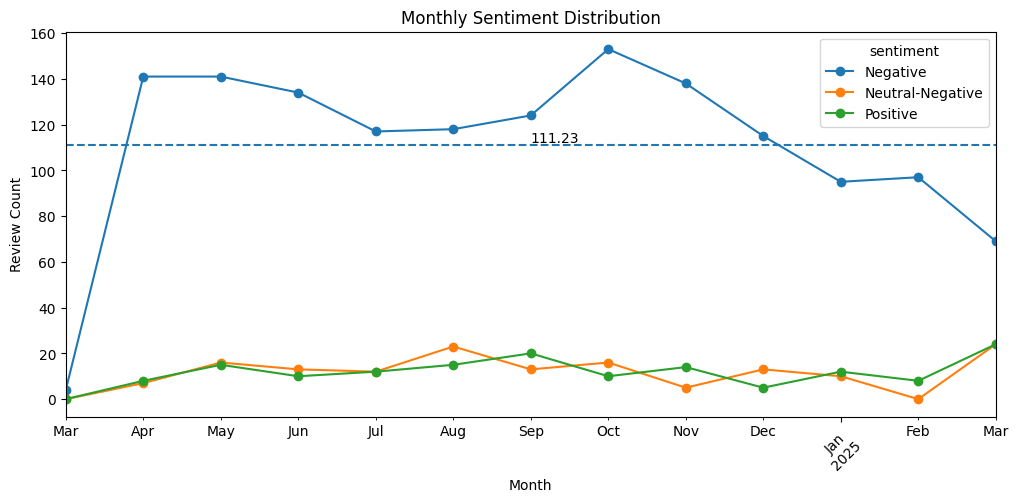

In [18]:
# Sentiment monthly distribution
sentiment_month = df_cleaned.groupby([df_cleaned['date'].dt.to_period('M'), df_cleaned['sentiment']]).size().unstack(fill_value=0)

# line chart
ax = sentiment_month.plot(kind='line', figsize=(12,5), marker='o')
# add mean line for 'negative'
neg_mean = sentiment_month['Negative'].mean()
ax.axhline(y=neg_mean, linestyle='--', label=f'Negative mean: {int(neg_mean)}')
ax.text(x=0.5, y=neg_mean + 1, s=f'{neg_mean:.2f}', fontsize=10, transform=ax.get_yaxis_transform())
plt.title("Monthly Sentiment Distribution")
plt.xlabel("Month")
plt.ylabel("Review Count")
plt.xticks(rotation=45)
plt.show()

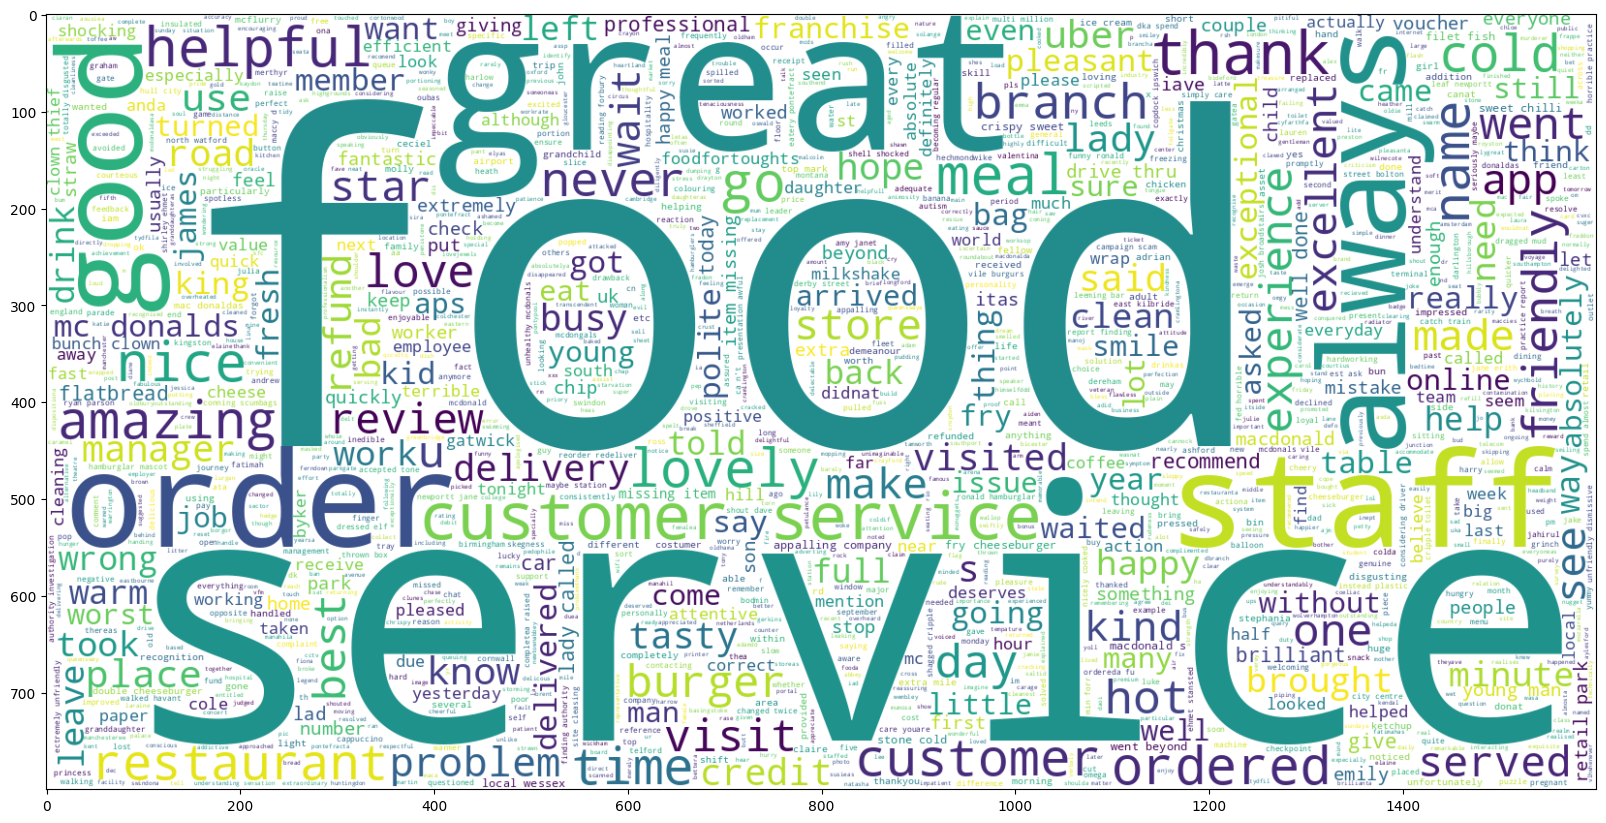

In [19]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df_cleaned[df_cleaned.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

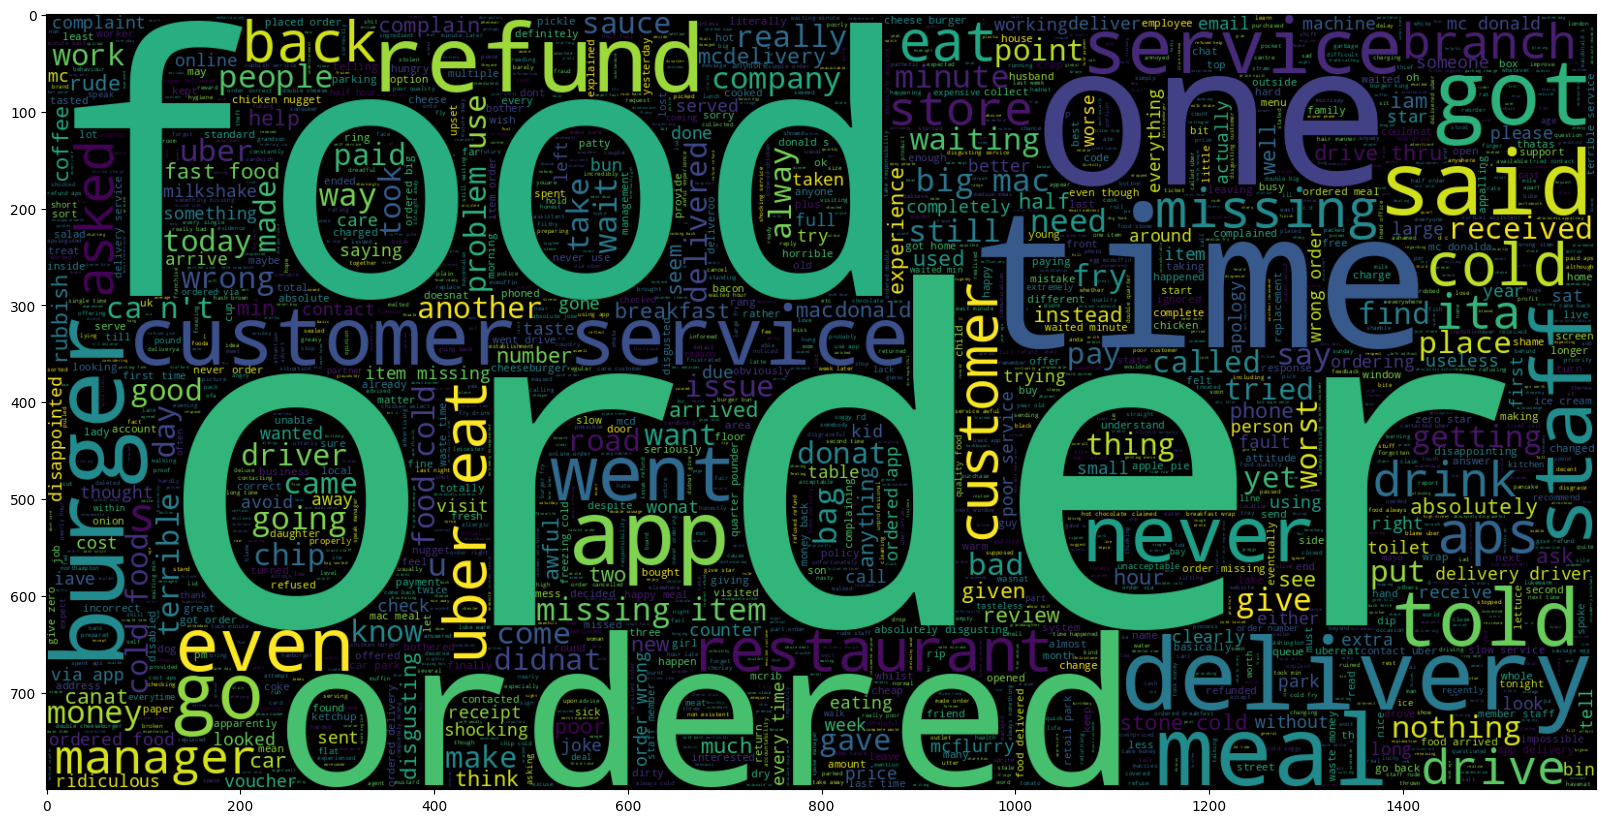

In [20]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df_cleaned[df_cleaned.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

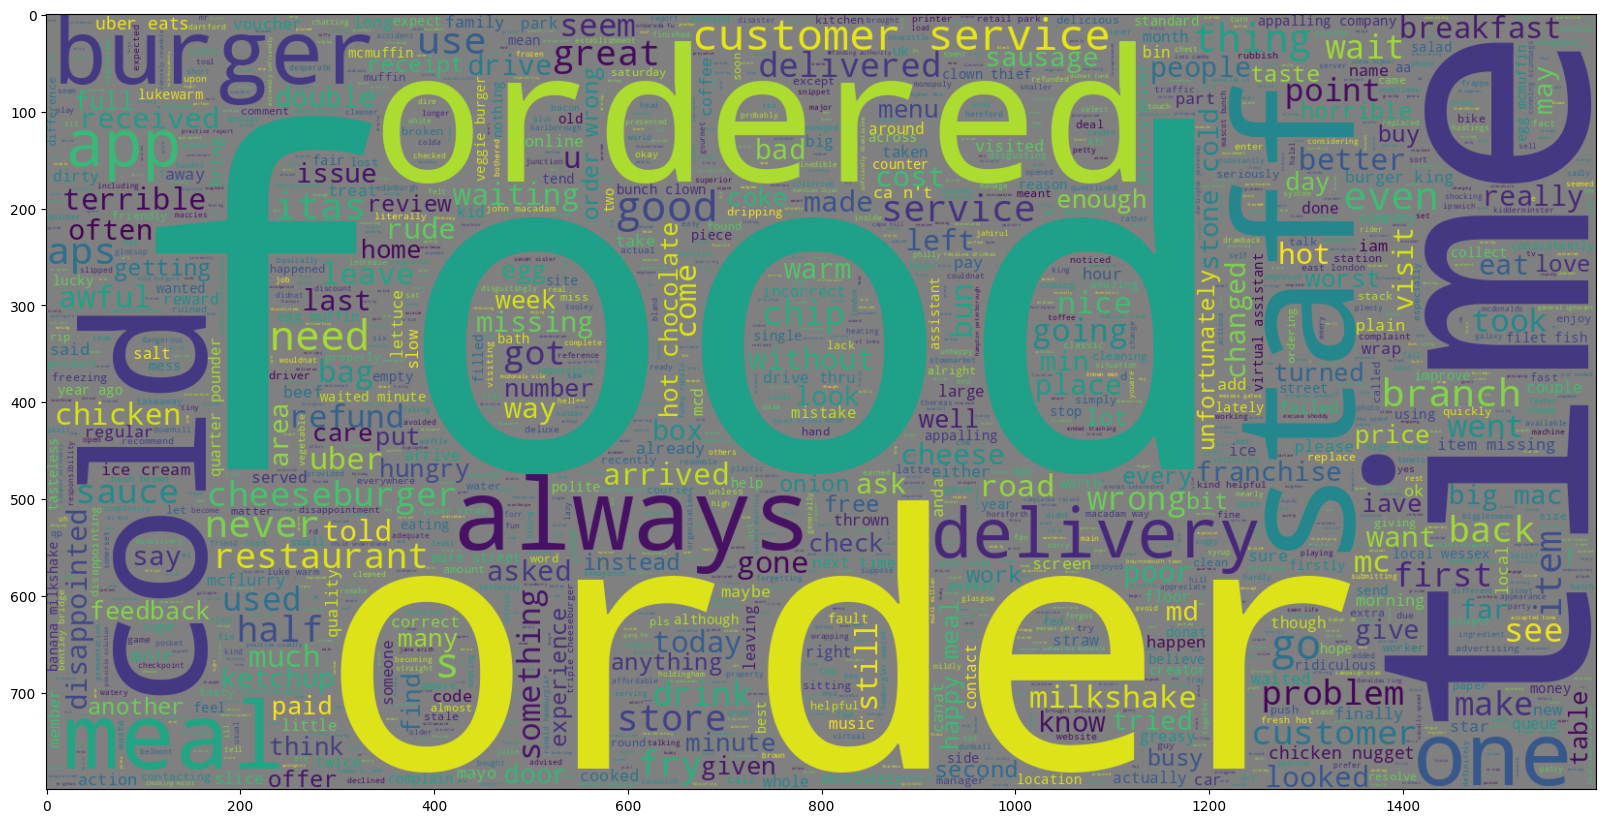

In [21]:
plt.figure(figsize = (20,20))
wc = WordCloud(background_color = 'grey',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df_cleaned[df_cleaned.sentiment == 'Neutral-Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

# **4. LDA Analysis for negative and neutral negative**

In [86]:
!pip install -q pandas gensim pyLDAvis bertopic nltk gdown matplotlib seaborn

In [87]:
# Adapt with Genism
!pip install numpy==1.23.5
!pip install --upgrade --force-reinstall gensim

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but 

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling nu

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import gensim
import gensim.corpora as corpora
from bertopic import BERTopic
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#Load dataset
df_cleaned = pd.read_csv("mcdonalds_uk_cleaned.csv")

# Keep negative + neutral-negative
df_LDA = df_cleaned[df_cleaned['sentiment'].isin(['Negative', 'Neutral-Negative'])].copy()
df_LDA.dropna(subset=['text'], inplace=True)

df_LDA.count()

Unnamed: 0    1598
date          1598
star_group    1598
text          1598
sentiment     1598
tokens        1598
dtype: int64

In [33]:
import nltk
from nltk.tokenize import word_tokenize

# Tokenize text
df_LDA['tokens'] = df_LDA['text'].apply(lambda x: word_tokenize(str(x)))

# Create dictionary and corpus
tokenized_texts = df_LDA['tokens'].tolist()
dictionary_UK = corpora.Dictionary(tokenized_texts)
corpus_UK = [dictionary_UK.doc2bow(text) for text in tokenized_texts]


=== LDA Topics ===
Topic 0: ['food', 'staff', 'order', 'time', 'service', 'meal', 'get', 'cold', 'never', 'customer']
Topic 1: ['order', 'ordered', 'missing', 'service', 'meal', 'item', 'time', 'food', 'get', 'burger']
Topic 2: ['order', 'app', 'uber', 'delivery', 'refund', 'service', 'ordered', 'get', 'food', 'one']
Topic 3: ['order', 'food', 'service', 'customer', 'delivery', 'time', 'uber', 'cold', 'missing', 'ordered']
Topic 4: ['food', 'cold', 'ordered', 'burger', 'time', 'minute', 'meal', 'service', 'drive', 'order']


Topics: 2, Coherence Score: 0.4491
Topics: 3, Coherence Score: 0.4769
Topics: 4, Coherence Score: 0.4533
Topics: 5, Coherence Score: 0.4747
Topics: 6, Coherence Score: 0.4614
Topics: 7, Coherence Score: 0.4505
Topics: 8, Coherence Score: 0.4462
Topics: 9, Coherence Score: 0.4357
Topics: 10, Coherence Score: 0.4342
Topics: 11, Coherence Score: 0.4304
Topics: 12, Coherence Score: 0.4226
Topics: 13, Coherence Score: 0.4207
Topics: 14, Coherence Score: 0.4115
Topics: 15, Coherence Score: 0.4203
Topics: 16, Coherence Score: 0.4014
Topics: 17, Coherence Score: 0.3972
Topics: 18, Coherence Score: 0.3870
Topics: 19, Coherence Score: 0.3987


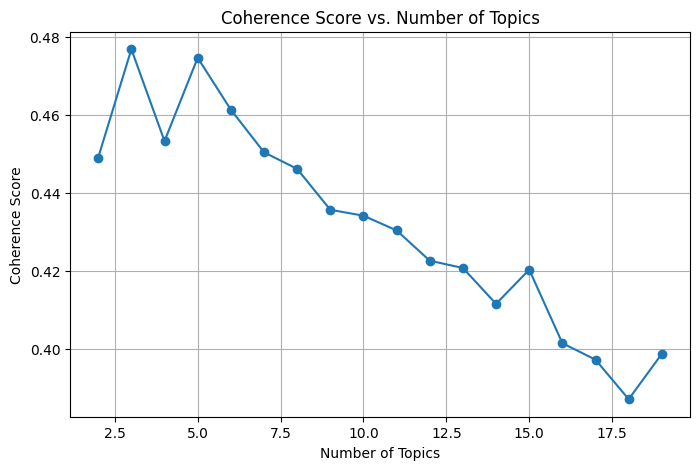

Optimal number of topics: 3


In [39]:
# Compute coherence scores across topic range, adjust parameters to find best one
def compute_coherence_values(dictionary, corpus, texts, topic_range):
    coherence_scores = []
    for num_topics in topic_range:
        lda_model = gensim.models.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=42,
            passes=10,
            iterations=300
        )
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence = coherence_model.get_coherence()
        coherence_scores.append(coherence)
        print(f"Topics: {num_topics}, Coherence Score: {coherence:.4f}")
    return coherence_scores

topic_range = range(2, 20)
coherence_scores = compute_coherence_values(dictionary_UK, corpus_UK, tokenized_texts, topic_range)

# Plot coherence scores
plt.figure(figsize=(8, 5))
plt.plot(topic_range, coherence_scores, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.grid()
plt.show()

# Find the optimal topic number
optimal_topic_num = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"Optimal number of topics: {optimal_topic_num}")

In [49]:
# get the optimal visualise

import pyLDAvis
import pyLDAvis.gensim_models

lda_model_UK = gensim.models.LdaModel(
    corpus=corpus_UK,
    id2word=dictionary_UK,
    num_topics=optimal_topic_num,
    random_state=42,
    passes=10,
    iterations=400,
)
pyLDAvis.enable_notebook(local=True)

vis = pyLDAvis.gensim_models.prepare(lda_model_UK, corpus_UK, dictionary_UK, sort_topics=False)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.055251  0.029631       1        1  39.622470
1      0.002889 -0.055054       2        1  25.333287
2     -0.058140  0.025423       3        1  35.044243, topic_info=       Term        Freq       Total Category  logprob  loglift
17     uber  384.000000  384.000000  Default  30.0000  30.0000
0       app  408.000000  408.000000  Default  29.0000  29.0000
485    eats  187.000000  187.000000  Default  28.0000  28.0000
202  minute  230.000000  230.000000  Default  27.0000  27.0000
14   refund  342.000000  342.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
340   would  103.492762  288.515437   Topic3  -5.3696   0.0233
41     meal  127.034695  422.764583   Topic3  -5.1646  -0.1538
139    back   86.243468  258.449315   Topic3  -5.5519  -0.0490
322     got   84.977112  299.133076   Topic3  -5.5667  -0.2099
193    even   76.863746  244.737338   Topic3  -5.6671  -0.1096

[278 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
891       1  0.138195  address
891       2  0.055278  address
891       3  0.801531  address
0         1  0.097802      app
0         2  0.114917      app
...     ...       ...      ...
95        1  0.315805    wrong
95        2  0.276330    wrong
95        3  0.407915    wrong
3734      2  0.973244    wrote
1908      3  0.862131     yuck

[450 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [45]:
# Print LDA topics with keywords
print("\n=== Final LDA Topics ===")
for topic_id, words in lda_model_UK.show_topics(num_topics=optimal_topic_num, num_words=10, formatted=False):
    print(f"Topic {topic_id}: {[word for word, _ in words]}")



=== Final LDA Topics ===
Topic 0: ['food', 'order', 'cold', 'service', 'staff', 'time', 'minute', 'customer', 'meal', 'ordered']
Topic 1: ['order', 'ordered', 'service', 'food', 'burger', 'time', 'meal', 'get', 'customer', 'got']
Topic 2: ['order', 'uber', 'app', 'food', 'delivery', 'refund', 'missing', 'service', 'ordered', 'get']


**BERT**

In [47]:
# Train BERTopic
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(df_LDA['text'])

# Get BERTopic topics
bertopic_topics = topic_model.get_topics()
num_bertopic_topics = len(bertopic_topics)

# Output BERTopic results
print(f"\n=== BERTopic: {num_bertopic_topics} Topics Found ===")
for topic_id, words in bertopic_topics.items():
    print(f"Topic {topic_id}: {[word for word, _ in words[:10]]}")


=== BERTopic: 22 Topics Found ===
Topic -1: ['order', 'food', 'service', 'time', 'delivery', 'ordered', 'get', 'customer', 'meal', 'cold']
Topic 0: ['burger', 'food', 'cold', 'big', 'fry', 'mac', 'bun', 'mc', 'chicken', 'cheese']
Topic 1: ['rude', 'staff', 'manager', 'asked', 'service', 'customer', 'order', 'member', 'one', 'even']
Topic 2: ['food', 'waiting', 'minute', 'wait', 'drive', 'slow', 'thru', 'min', 'fast', 'went']
Topic 3: ['toilet', 'staff', 'floor', 'dirty', 'table', 'hygiene', 'restaurant', 'food', 'place', 'visit']
Topic 4: ['app', 'order', 'use', 'useless', 'tried', 'time', 'delivery', 'address', 'terrible', 'work']
Topic 5: ['cold', 'delivery', 'stone', 'food', 'delivered', 'chip', 'ordered', 'order', 'half', 'minute']
Topic 6: ['item', 'missing', 'order', 'time', 'branch', 'wakefield', 'missed', 'ba', 'report', 'uber']
Topic 7: ['mcdelivery', 'uber', 'missing', 'item', 'eats', 'refund', 'order', 'delivery', 'contact', 'service']
Topic 8: ['egg', 'mcmuffin', 'sausage'

In [41]:
# Extract the top 10 keywords for each BERTopic topic
ber_topic_tokens = [[word for word, _ in topic[:10]] for topic in bertopic_topics.values()]

# Filter out any empty topics to avoid errors
ber_topic_tokens = [topic for topic in ber_topic_tokens if topic]

# Compute Coherence Score for BERTopic using the LDA dictionary
coherence_model_bertopic = CoherenceModel(
    topics=ber_topic_tokens, texts=df_LDA['tokens'], dictionary=dictionary_UK, coherence='c_v'
)
coherence_bertopic = coherence_model_bertopic.get_coherence()

print(f"BERTopic Coherence Score: {coherence_bertopic:.3f}")

BERTopic Coherence Score: 0.506


Comparison:

In [48]:
# LDA diversity
def calculate_lda_topic_diversity(lda_model, top_n_words=10):
    topics = lda_model.show_topics(num_topics=lda_model.num_topics, num_words=top_n_words, formatted=False)
    unique_words = set()
    for topic in topics:
        unique_words.update([word for word, _ in topic[1]])
    return len(unique_words) / (top_n_words * lda_model.num_topics)

lda_topic_diversity = calculate_lda_topic_diversity(lda_model_UK)

# BERTopic diversity
def calculate_topic_diversity(model, top_n_words=10):
    words = model.get_topics()
    unique_words = set()
    for topic in words.values():
        unique_words.update([word for word, _ in topic[:top_n_words]])
    return len(unique_words) / (top_n_words * len(words))

bertopic_topic_diversity = calculate_topic_diversity(topic_model)

print(f"LDA Topic Diversity Score: {lda_topic_diversity:.3f}")
print(f"BERTopic Topic Diversity Score: {bertopic_topic_diversity:.3f}")

LDA Topic Diversity Score: 0.567
BERTopic Topic Diversity Score: 0.645
